In [25]:
# import all relevant packages
import pandas as pd
from pandas import DataFrame
from pandas import read_csv

import numpy as np
from numpy.polynomial import Polynomial
from numpy.polynomial import Polynomial

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib import ticker as tick

import scipy
from scipy.stats.stats import pearsonr
from scipy import fftpack
from scipy.signal import savgol_filter



from datetime import datetime

In [98]:
# create a custom date parse function for the data
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")

# create an easy variable for the .csv file path
filename_weekly = r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\SRO_flux\ExtractedSubset\WeeklySubset.csv'
filename_daily = r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\SRO_flux\ExtractedSubset\DailySubset.csv'
filename_yearly= r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\SRO_flux\ExtractedSubset\YearlySubset.csv'
filename_df_d= r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\SRO_Validation\SRO_Data.csv'
filenameSRO= r"C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\SRO_Validation\SRO_Phenology.csv"
pheno1 = r"C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\PhenoCompare.csv"
filename_monthly = r"C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\SRO_flux\ExtractedSubset\MonthlySubset.csv"

# load in the .csv using pandas.read_csv
df_weekly = read_csv(filename_weekly, header=0, parse_dates=[0], date_parser=custom_date_parser, index_col ='TIMESTAMP_START')
df_daily = read_csv(filename_daily, header=0, parse_dates=[0], date_parser= custom_date_parser, index_col = 'Date')
df_monthly= read_csv(filename_monthly, header=0, parse_dates=[4], date_parser=custom_date_parser, index_col ='Time')
df_yearly = read_csv(filename_yearly, header=0, index_col = 'YEAR')
pheno = read_csv(pheno1, header = 0, index_col = 'Index')
SRO_20 = read_csv(filename_df_d, header=0)
SROchange = read_csv(filenameSRO, header=0, parse_dates=[1], date_parser= custom_date_parser, index_col = 'index')
# inquire the data to check the data types
# df.info()

# show the first 13 values to ensure they are correct
# df.head(13)

# from the full subset only select the required values to make process time faster
df_w = df_weekly[['VPD_F','P_F','PPFD_IN','TA_F','SW_IN_F',
         'NEE_VUT_REF','GPP_DT_VUT_REF','RECO_DT_VUT_REF']]
df_d = df_daily[['VPD_F','P_F','PPFD_IN','TA_F','SW_IN_F',
         'NEE_VUT_REF','GPP_DT_VUT_REF','RECO_DT_VUT_REF']]
df_m = df_monthly[['GPP_DT_VUT_REF','P_F','VPD_F']]
df_y = df_yearly[['GPP_DT_VUT_REF','P_F']]
SRO_20 = SRO_20[['Date','GPP_MINCORRECTED_20th']]

# show the first 13 values to ensure they are correct
df_w.tail(5)
#df_d.head(5)
#df_w.describe()

plt.rcParams["figure.figsize"] = (40,15)
plt.rcParams.update({'font.size' : 24})


df_y


,GPP_DT_VUT_REF,P_F
YEAR,,
1999,1564.11,926.272
2000,1934.90,999.699
2001,1818.12,843.103
2002,1912.10,1148.590
2003,1638.90,777.959
2004,1747.62,1148.212
2005,1842.61,154.560
2006,2165.29,656.200
2007,2325.88,571.200


In [27]:
plt.rcParams["figure.figsize"] = (40,15)
plt.rcParams.update({'font.size' : 30})
plt.rcParams['figure.autolayout'] = True

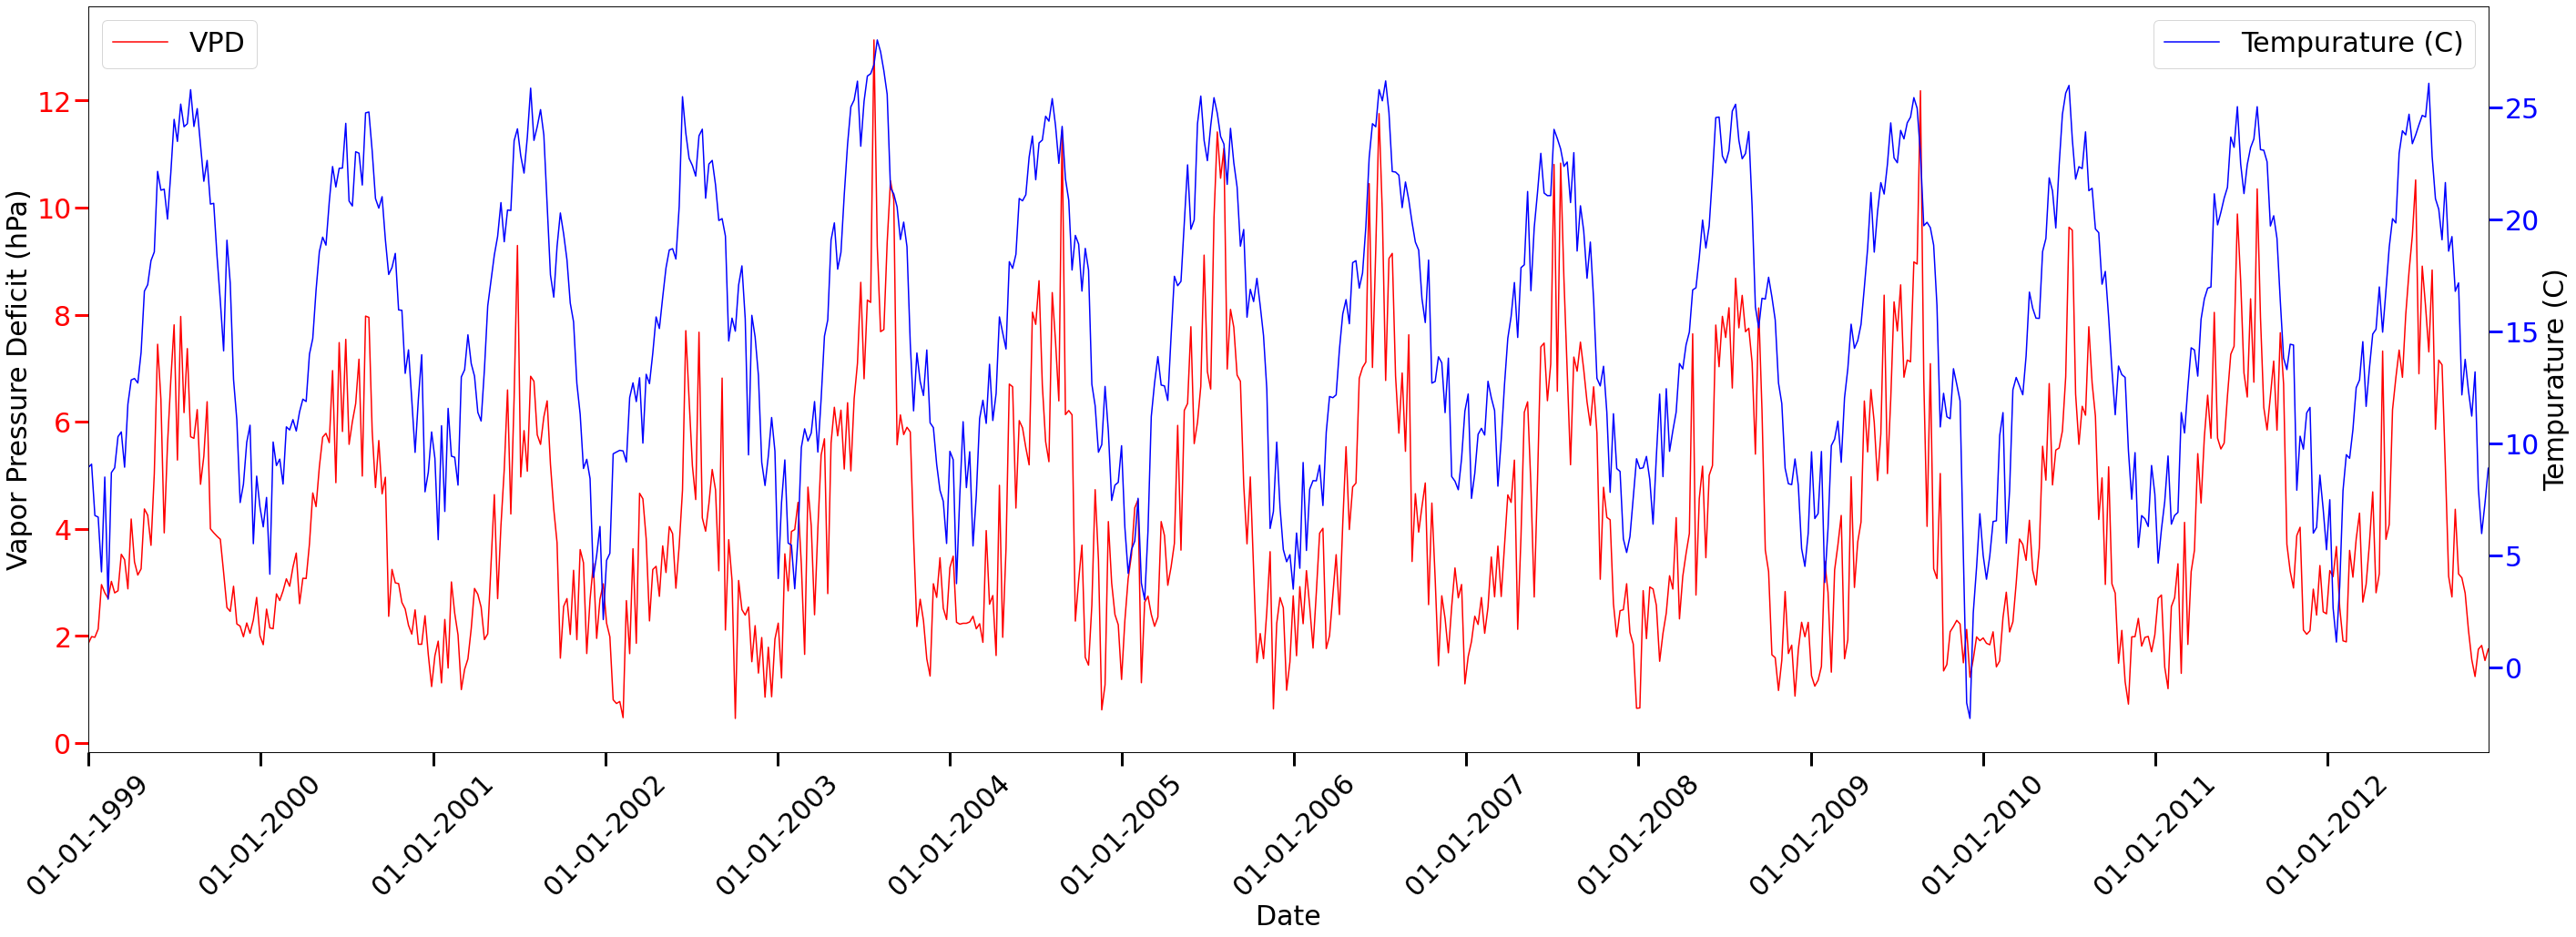

C:\Users\Giorgio\AppData\Local\Temp\ipykernel_20988\801290548.py:40: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  pp.stem(df_w.index, df_w['P_F'],'b')


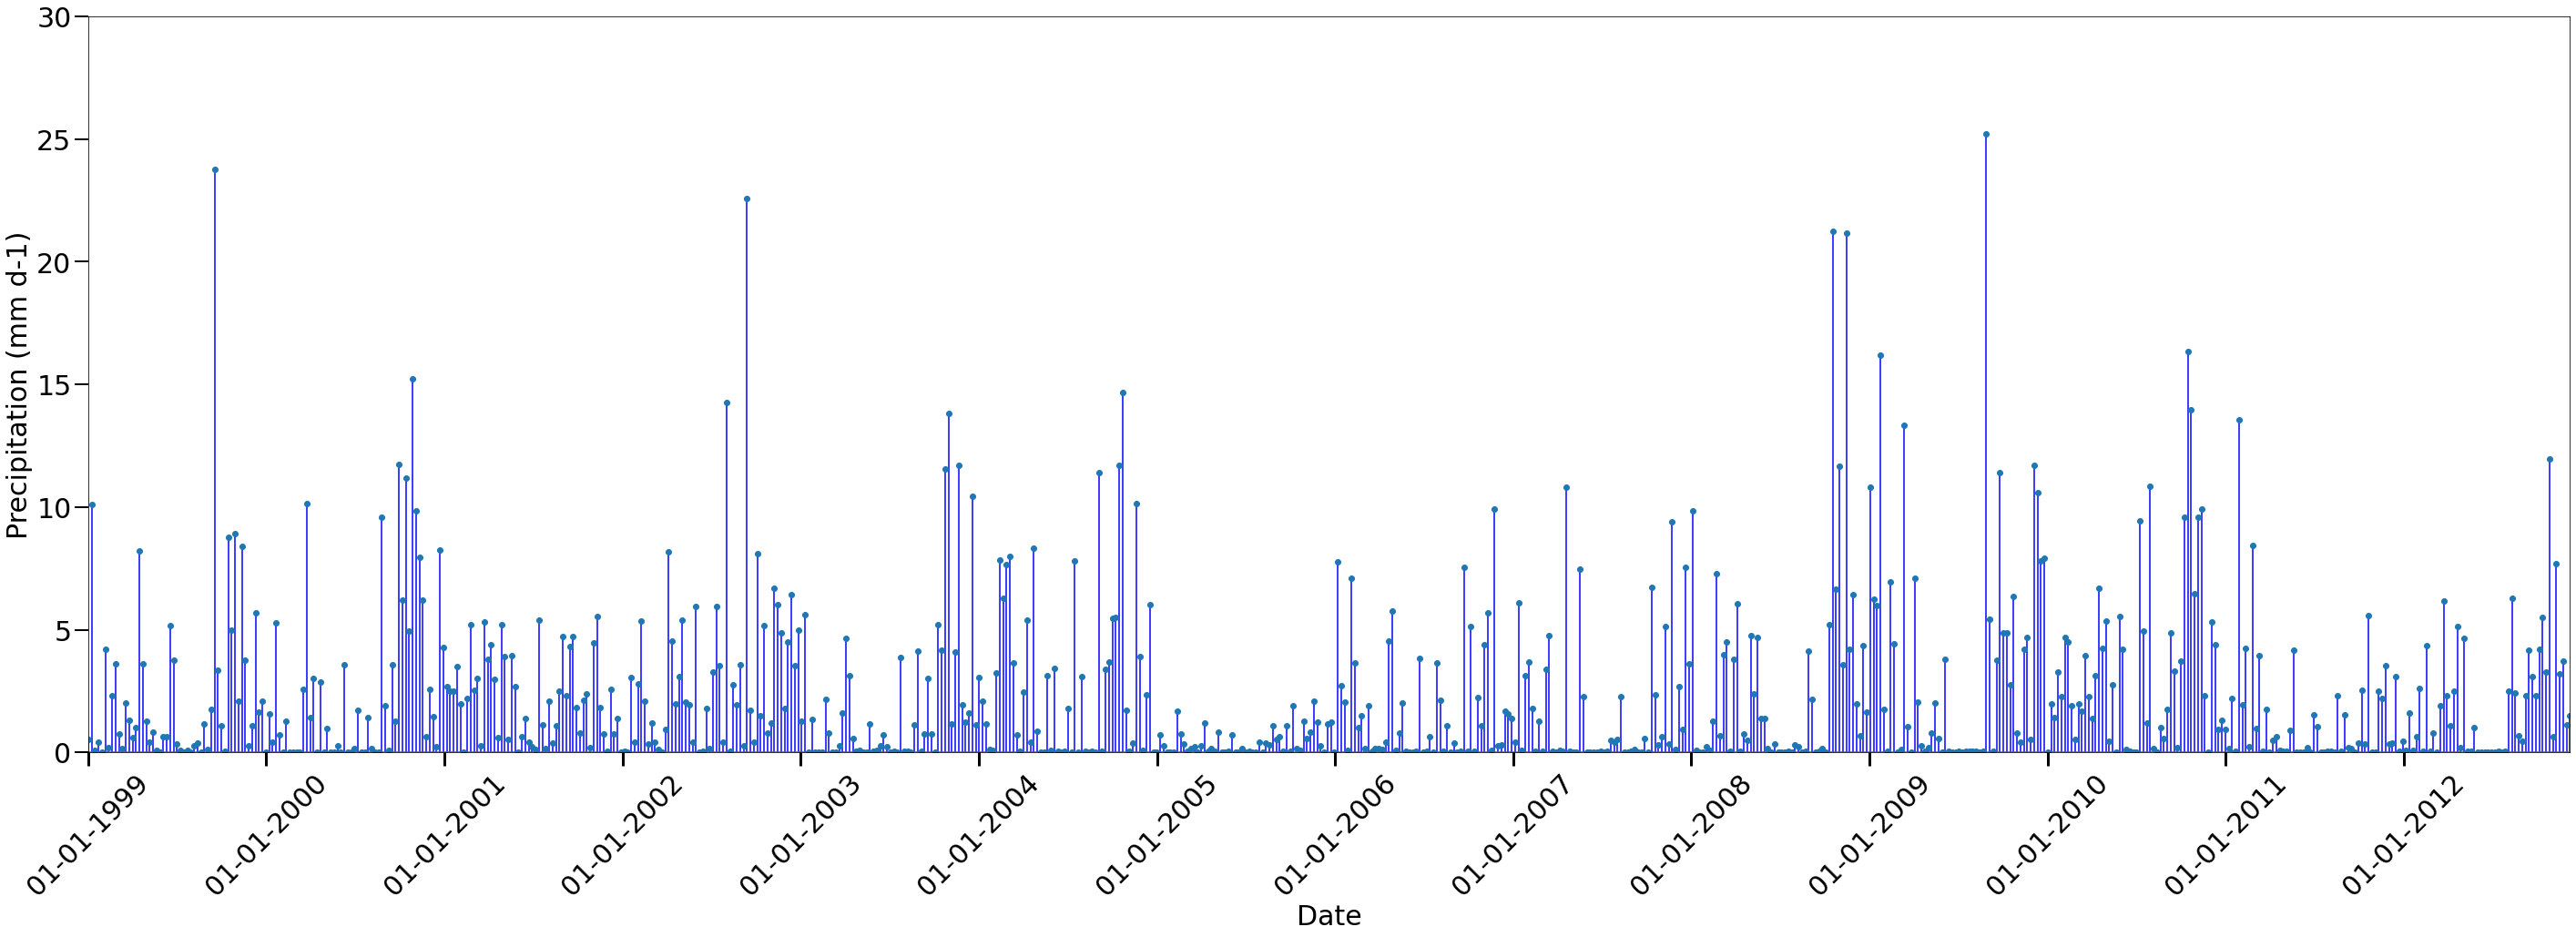

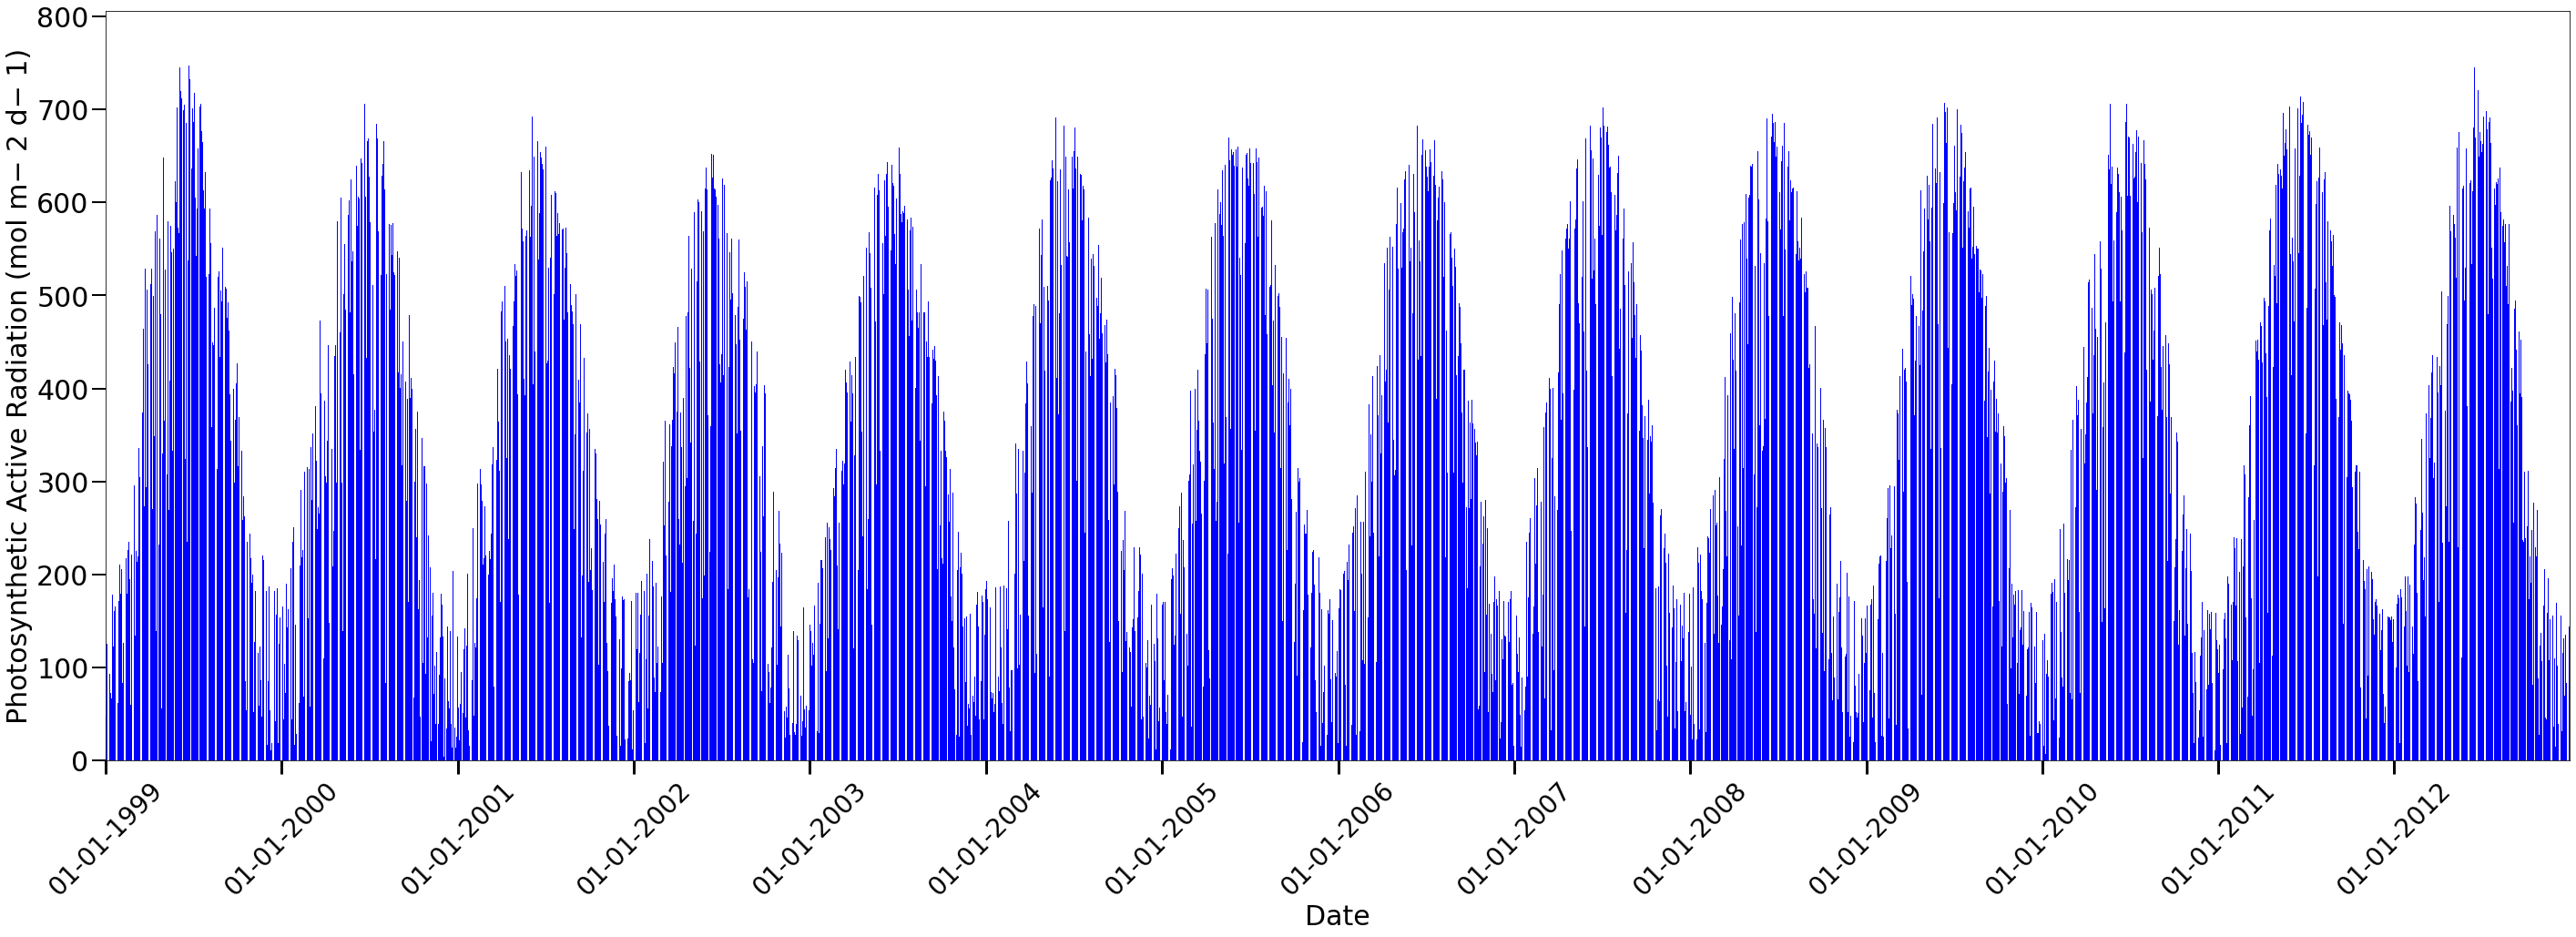

In [28]:
## Plot weekly figures for the status of the study site. VPD, Precip, PAR, Temp

fig, vpd1 = plt.subplots()
vpd1.plot(df_w.index, df_w['VPD_F'], color = 'red', label = 'VPD')

# set x-label 
vpd1.set_xlabel('Date')
vpd1.tick_params('x', labelsize =30,length = 15 , width = 3)


# set primary y label
vpd1.set_ylabel('Vapor Pressure Deficit (hPa)')
vpd1.tick_params('y', colors = 'red', labelsize =30,length = 15 , width = 3)

plt.xticks(rotation = 45)

# twin the x axis, now they both series' will use x axis but have different ranges on the Y
ax2 = vpd1.twinx()

# define the plot for the secondary y
ax2.plot(df_w.index, df_w['TA_F'], label = 'Tempurature (C)', color = 'blue')
ax2.set_ylabel('Tempurature (C)')
ax2.tick_params('y', colors = 'blue', labelsize =30, length = 15 , width = 3
)

# set x-axis limits as the min and max of the series
vpd1.set_xlim(date2num([df_w.index.min(), df_w.index.max()]))
vpd1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
vpd1.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))
vpd1.tick_params(length = 15 , width = 3)

# call legend
vpd1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\VPT_TEMP.jpeg', format = 'jpeg', dpi = 400)
plt.show()

fig, pp = plt.subplots()
pp.stem(df_w.index, df_w['P_F'],'b')

# x params
pp.set_xlabel('Date')
pp.tick_params('x', labelsize =30,length = 15 , width = 3)

plt.xticks(rotation = 45)
pp.set_xlim(date2num([df_w.index.min(), df_w.index.max()]))
pp.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
pp.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))


# y params
pp.set_ylabel('Precipitation (mm d-1)')
pp.set_ylim(0,30)
pp.tick_params('y', labelsize = 30,length = 15 , width = 2)



plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\pp.jpeg', format = 'jpeg', dpi = 400)
plt.show()

# calculate PAR using method from Vanikiotis et al., 
# multiplying SW_IN_F by the latitudanl factor from Howell et al., (1.9493)


# remove null values
df_d_sw = df_d[df_d['SW_IN_F']!= 0]

# multiply the SW incoming by the value detailed in Howell and Vanikiotis
PAR = df_d_sw['SW_IN_F'].mul(1.9493)

# plot PAR againts time
fig, par = plt.subplots()
par.bar(df_d_sw.index, PAR, color = 'blue')

# set x axis params
par.set_xlabel('Date')
par.set_xlim(date2num([df_d_sw.index.min(), df_d_sw.index.max()]))
par.tick_params('x', labelsize = 28)
plt.xticks(rotation = 45)
par.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
par.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))
par.tick_params(length = 15 , width = 3)


# set y axis params
par.set_ylabel('Photosynthetic Active Radiation (mol m− 2 d− 1)')
par.set_ylim()
par.tick_params('y', labelsize =30,length = 15 , width = 2)



# save the figs as .png

plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\PAR.jpeg', format = 'jpeg', dpi = 400)

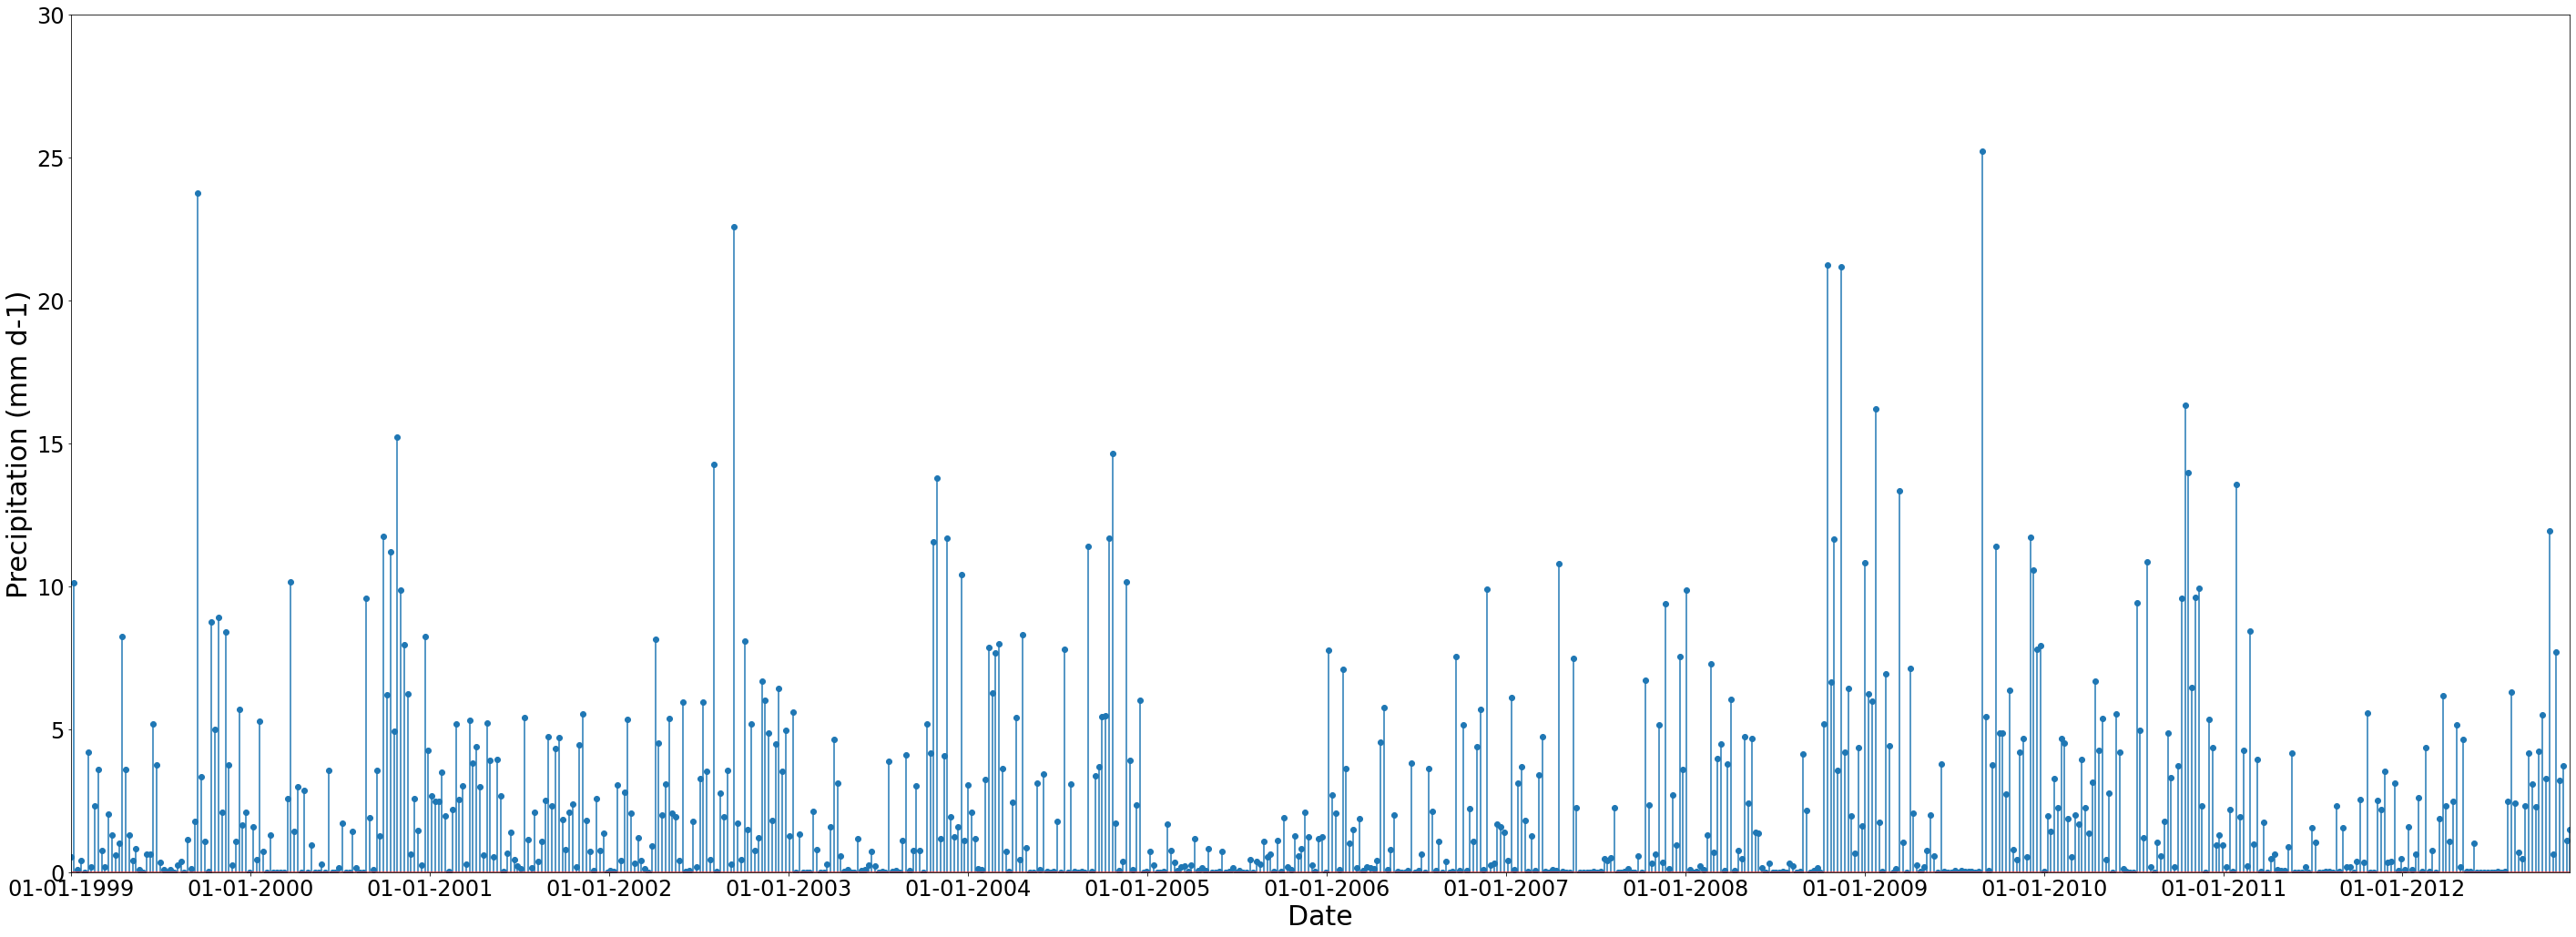

In [29]:
# Precipitaton plot time against weekly average precip
fig, pp = plt.subplots()
pp.stem(df_w.index, df_w['P_F'])

# x params
pp.set_xlabel('Date')
pp.tick_params('x', labelsize =24)
pp.set_xlim(date2num([df_w.index.min(), df_w.index.max()]))
pp.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
pp.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

# y params
pp.set_ylabel('Precipitation (mm d-1)')
pp.set_ylim(0,30)
pp.tick_params('y', labelsize = 24)

plt.show()


In [30]:

# remove null values
df_d_sw = df_d[df_d['SW_IN_F']!= 0]

# multiply the SW incoming by the value detailed in Howell and Vanikiotis
PAR = df_d_sw['SW_IN_F'].mul(1.9493)


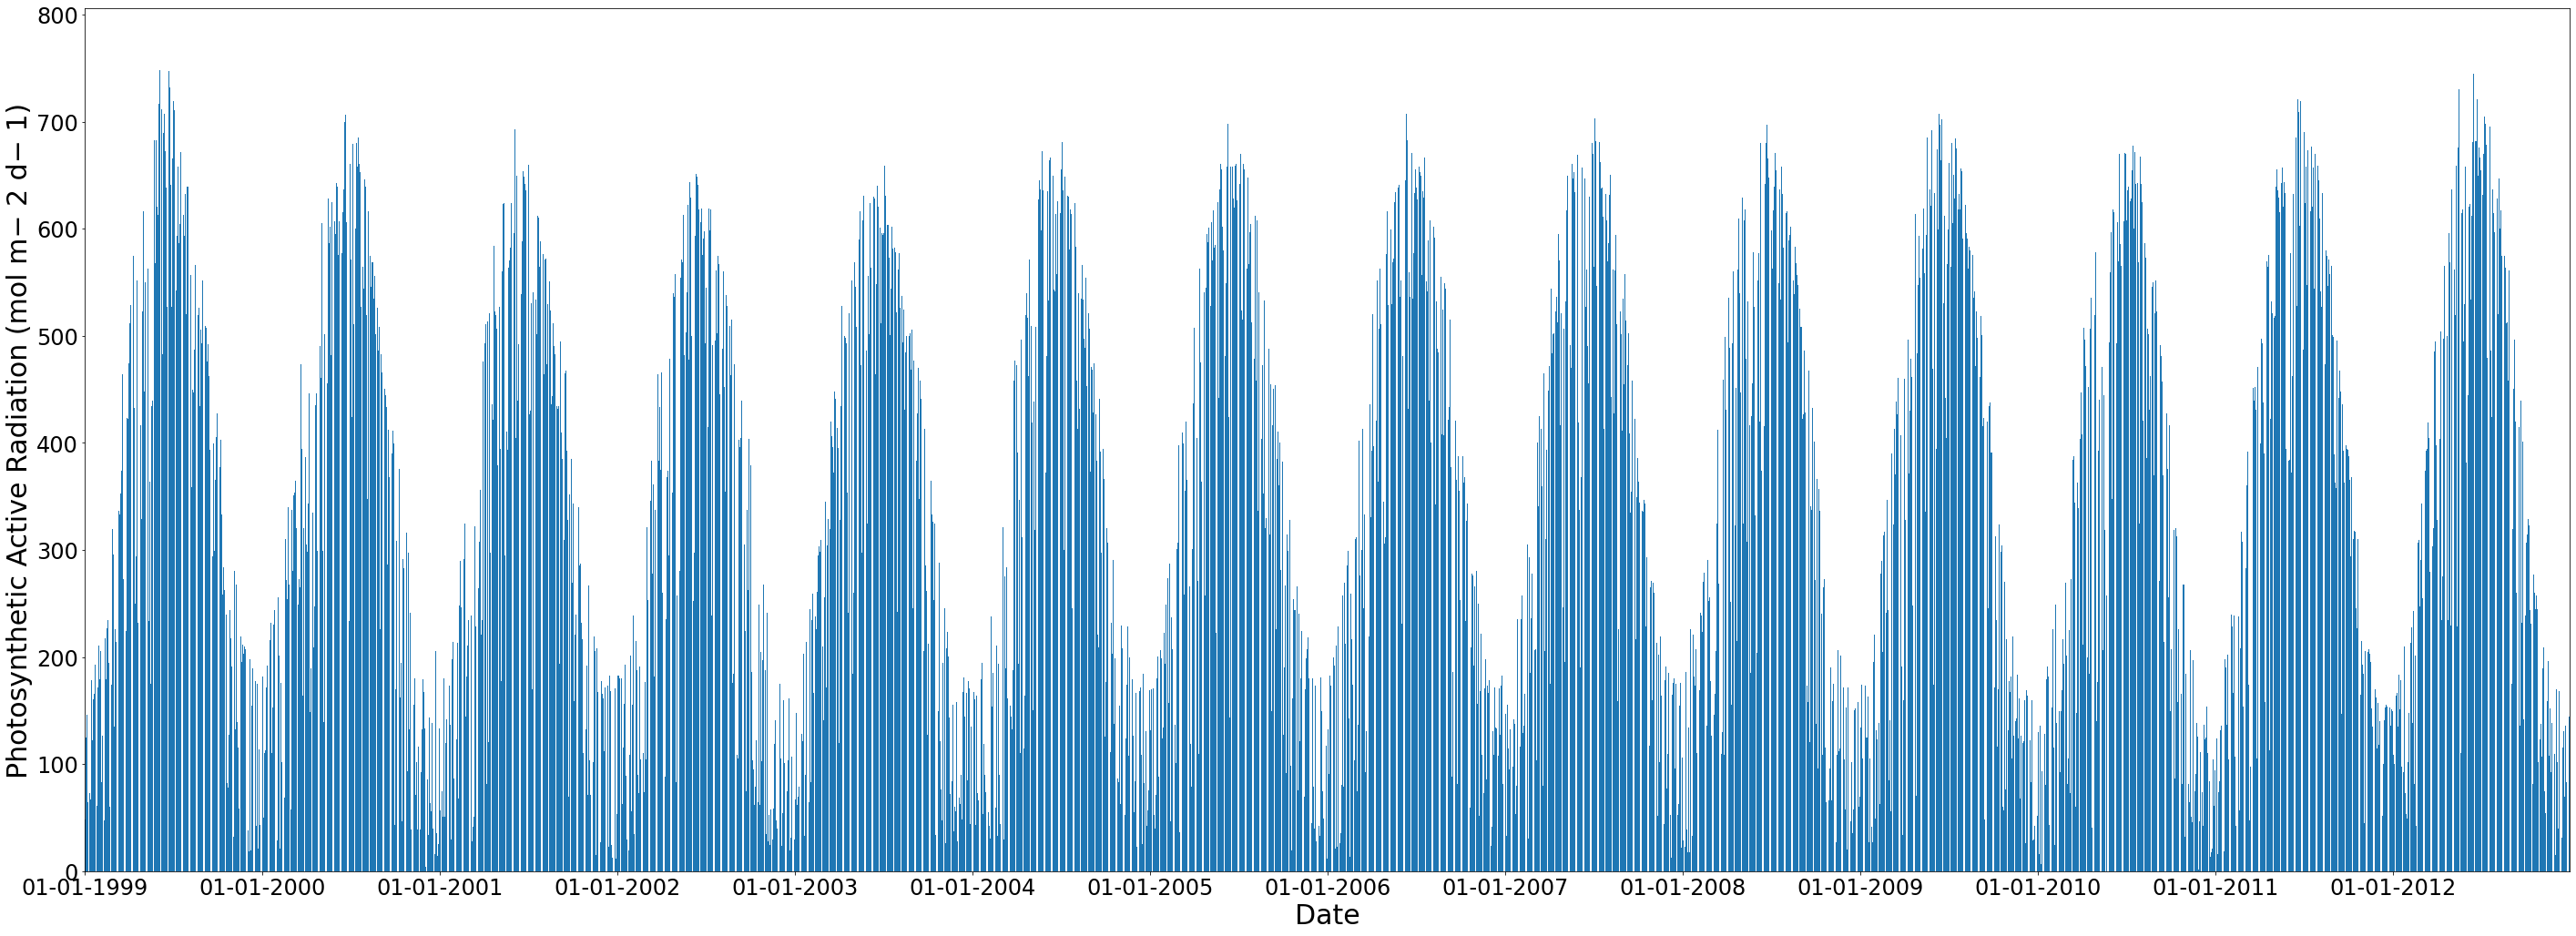

In [31]:
# calculate PAR using method from Vanikiotis et al., 
# multiplying SW_IN_F by the latitudanl factor from Howell et al., (1.9493)

# plot PAR againts time
fig, par = plt.subplots()
par.bar(df_d_sw.index, PAR)

# set x axis params
par.set_xlabel('Date')
par.set_xlim(date2num([df_d_sw.index.min(), df_d_sw.index.max()]))
par.tick_params('x', labelsize = 24)
par.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
par.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))


# set y axis params
par.set_ylabel('Photosynthetic Active Radiation (mol m− 2 d− 1)')
par.set_ylim()
par.tick_params('y', labelsize =24)


In [32]:
df_d


,VPD_F,P_F,PPFD_IN,TA_F,SW_IN_F,NEE_VUT_REF,GPP_DT_VUT_REF,RECO_DT_VUT_REF
Date,,,,,,,,
1999-01-01,2.157,0.800,123.425660,10.367,64.181,1.255840,2.49982,4.34362
1999-01-02,1.545,0.400,47.808679,8.519,24.861,1.669180,1.71496,4.21774
1999-01-03,1.771,2.000,135.355558,9.143,70.385,0.996045,2.69910,4.26027
1999-01-04,1.986,0.200,123.351336,8.616,64.143,1.128910,2.67113,4.21927
1999-01-05,2.027,0.200,146.680996,7.621,76.274,0.917502,2.82049,4.14504
...,...,...,...,...,...,...,...,...
2012-12-27,1.794,0.252,69.747552,11.553,37.587,1.217680,2.69103,5.22629
2012-12-28,3.765,0.019,145.256641,11.583,80.726,0.462792,3.91799,6.11599
2012-12-29,2.351,0.000,133.227604,6.270,74.032,0.317042,4.23547,4.78281


In [33]:
pheno['SRO_SoS'] = pd.to_datetime(pheno['SRO_SoS'], format = "%d/%m/%Y" )
pheno['SRO_EoS'] = pd.to_datetime(pheno['SRO_EoS'], format = "%d/%m/%Y" )
#pheno['SRO_DateDelta'] = pd.to_datetime(pheno['SRO_DateDelta'])
pheno['EVI_SoS'] = pd.to_datetime(pheno['EVI_SoS'], format = "%d/%m/%Y" )
pheno['EVI_EoS'] = pd.to_datetime(pheno['EVI_EoS'], format = "%d/%m/%Y" )
pheno['YearlyTOT'] = df_y['GPP_DT_VUT_REF']
#SRO_20['Date'] = pd.to_datetime(SRO_20['Date'], format = "%d/%m/%Y" )

print(pheno)
#df_y.set_index('TIMESTAMP')


         SRO_SoS  SRO_StartDateDelta    SRO_EoS  SRO_EndDateDelta  \
Index                                                               
1999  1999-01-10                  10 1999-12-02               336   
2000  2000-01-29                  29 2000-11-03               308   
2001  2001-02-18                  49 2001-11-22               326   
2002  2002-01-19                  19 2002-10-27               300   
2003  2003-02-06                  37 2003-11-05               309   
2004  2004-02-26                  57 2004-11-04               309   
2005  2005-02-27                  58 2005-11-24               328   
2006  2006-02-19                  50 2006-12-10               344   
2007  2007-02-08                  39 2007-11-18               322   
2008  2008-01-31                  31 2008-11-03               308   
2009  2009-02-16                  47 2009-11-06               310   
2010  2010-01-28                  28 2010-11-17               321   
2011  2011-02-22                  

In [34]:
#print(df_y)

ds = np.array(pheno['SRO_DateDelta'])

season_norm = (ds - ds.min())/(ds.max() - ds.min())

print(season_norm)

[1.         0.52525253 0.50505051 0.54545455 0.45454545 0.25252525
 0.43434343 0.67676768 0.56565657 0.50505051 0.36363636 0.66666667
 0.         0.24242424]


In [35]:
print(pheno)

         SRO_SoS  SRO_StartDateDelta    SRO_EoS  SRO_EndDateDelta  \
Index                                                               
1999  1999-01-10                  10 1999-12-02               336   
2000  2000-01-29                  29 2000-11-03               308   
2001  2001-02-18                  49 2001-11-22               326   
2002  2002-01-19                  19 2002-10-27               300   
2003  2003-02-06                  37 2003-11-05               309   
2004  2004-02-26                  57 2004-11-04               309   
2005  2005-02-27                  58 2005-11-24               328   
2006  2006-02-19                  50 2006-12-10               344   
2007  2007-02-08                  39 2007-11-18               322   
2008  2008-01-31                  31 2008-11-03               308   
2009  2009-02-16                  47 2009-11-06               310   
2010  2010-01-28                  28 2010-11-17               321   
2011  2011-02-22                  

In [36]:
gppnp = np.array(df_d['GPP_DT_VUT_REF'])

In [37]:
gppsg = savgol_filter(gppnp, 81, 2) # Savistky-Golay on a 2nd order polynomial function

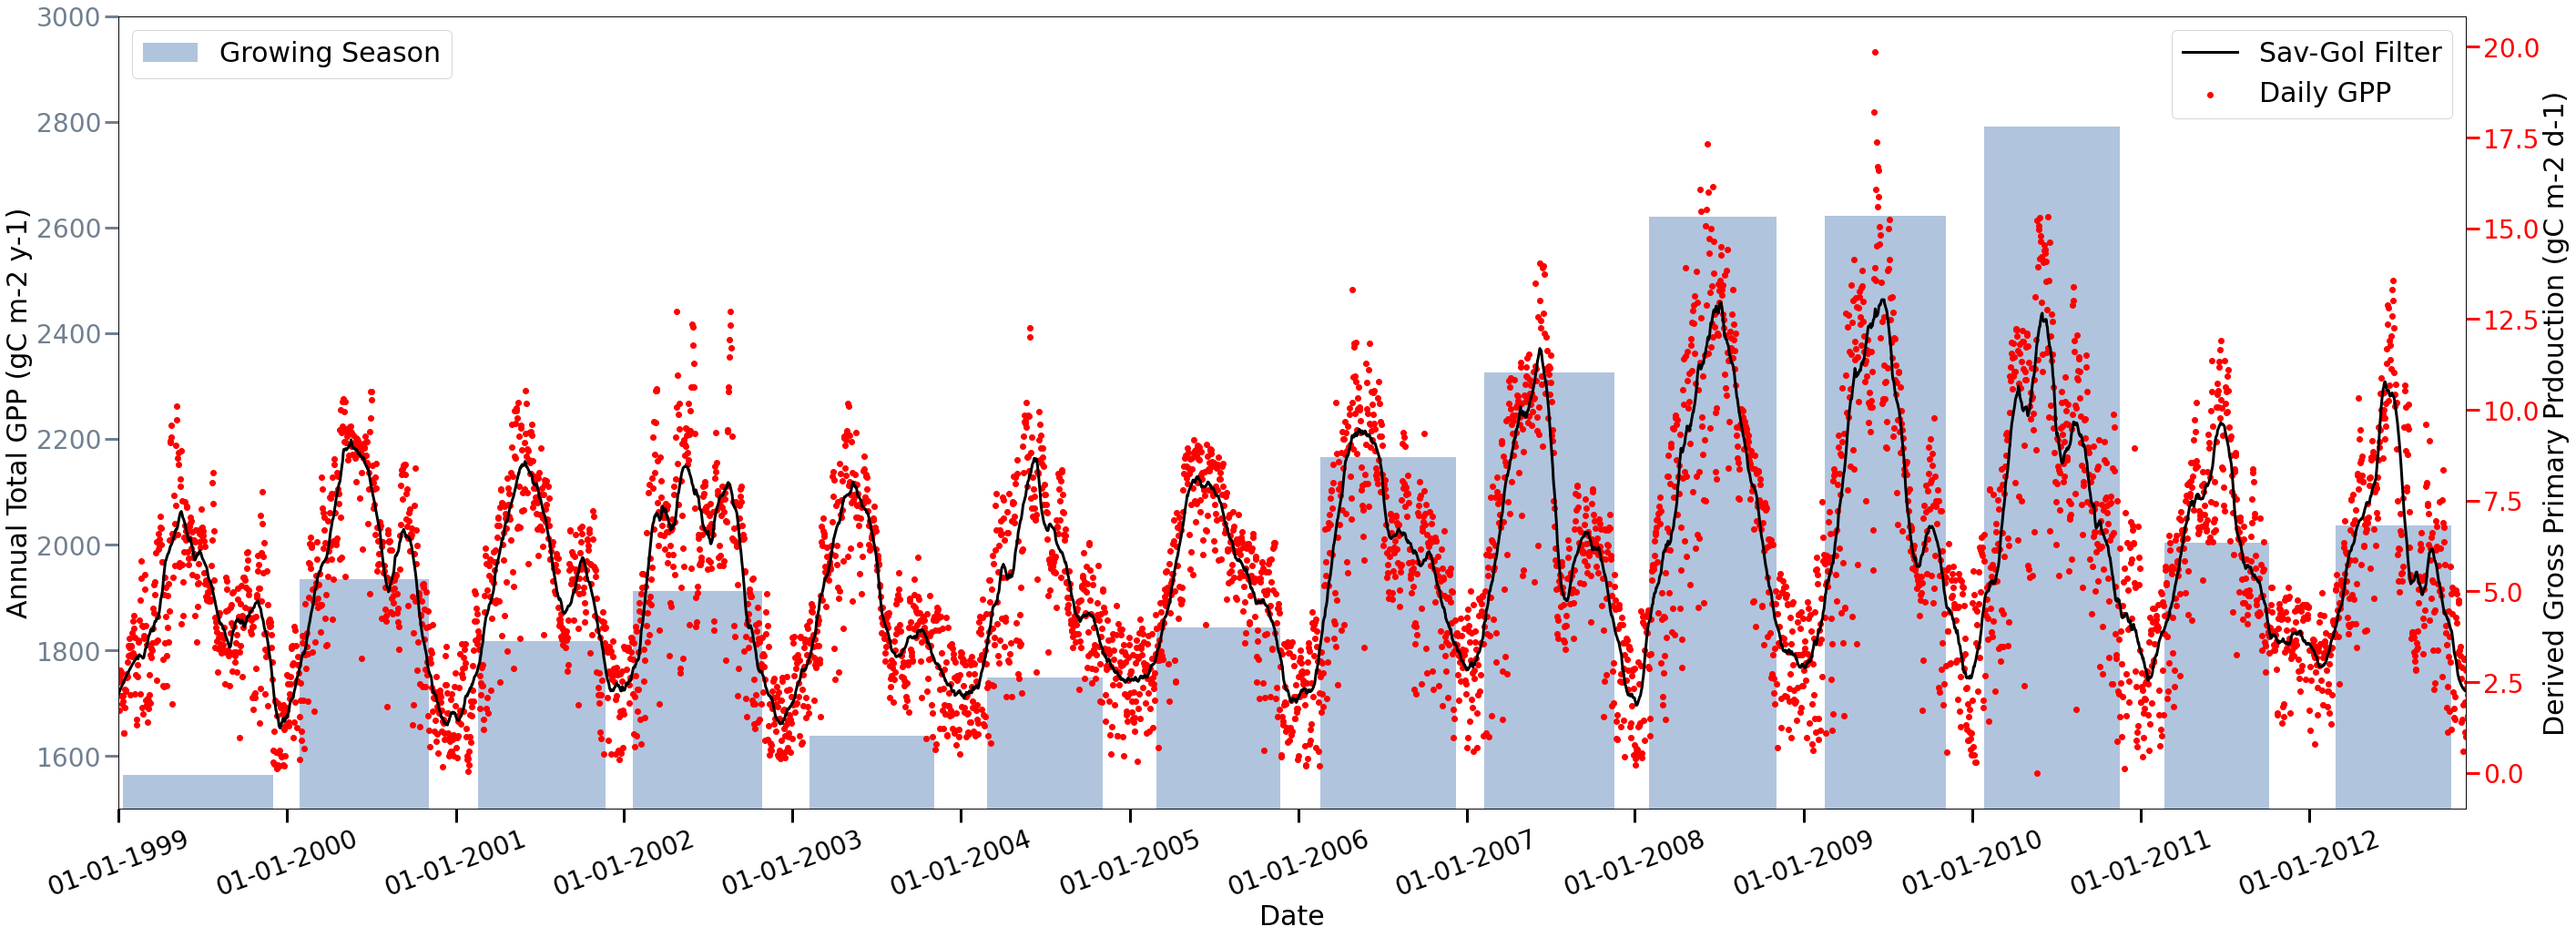

In [38]:
# show the phenology season
fig, season = plt.subplots()

#my_cmap = plt.get_cmap("copper")

#colorrange = season_norm #Range should be in range of 0 to 1
season.set_ylabel('Annual Total GPP (gC m-2 y-1)')
season.tick_params('y', colors = 'slategray', labelsize =28)

season.bar(x = pheno['SRO_SoS'], height = df_y['GPP_DT_VUT_REF'], width = pheno['SRO_DateDelta'],
           zorder=1, color = 'lightsteelblue', align = 'edge', label = 'Growing Season')

#color=my_cmap(colorrange)
season.set_ylim(1500,3000)
#season.grid(True)
season.set_xlabel('Date')
season.tick_params('x', labelsize =28, rotation=20,length = 15, width = 3)
daily = season.twinx()

daily.plot(df_d.index, gppsg, color = 'black', label= 'Sav-Gol Filter', linewidth = 3)
daily.scatter(df_d.index,df_d['GPP_DT_VUT_REF'], color = 'red', label = 'Daily GPP')


# set primary y label
daily.set_ylabel('Derived Gross Primary Prdouction (gC m-2 d-1)')
daily.tick_params('y', colors = 'red', labelsize =28 )

# set x-axis limits as the min and max of the series
season.set_xlim(date2num([df_w.index.min(), df_w.index.max()]))
season.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
season.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

#temp.set_ylim(-5,30)

# show the phenology season
#temp.tick_params('y', length = 15, width = 3)
season.tick_params('y', length = 15 , width = 3)
daily.tick_params('y', length = 15, width = 3)
season.legend(loc = 'upper left')
daily.legend(loc = 'upper right')


plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\SRO_Val\SRO_changes2.jpeg', format = 'jpeg', dpi = 400)
plt.show()


In [41]:
SROchange['EOS_Date'] = pd.to_datetime(SROchange['EOS_Date'], format = "%d/%m/%Y" )

In [42]:
SROchange['diff'] = SROchange['EOS_DOY']-SROchange['SOS_DOY']
pheno['diff'] = pheno['SRO_EndDateDelta']- pheno['SRO_StartDateDelta']

SROchange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 1999 to 2012
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SOS_Date    14 non-null     datetime64[ns]
 1   SOS_DOY     14 non-null     float64       
 2   EOS_Date    14 non-null     datetime64[ns]
 3   EOS_DOY     14 non-null     float64       
 4   DateDelta   14 non-null     float64       
 5   Unnamed: 6  0 non-null      float64       
 6   diff        14 non-null     float64       
dtypes: datetime64[ns](2), float64(5)
memory usage: 896.0 bytes


In [43]:
x = SROchange.index

SoSz = np.polyfit(x,  SROchange['SOS_DOY'], 1)
SoSp = np.poly1d(SoSz)

EoSz = np.polyfit(x,  SROchange['EOS_DOY'], 1)
EoSp = np.poly1d(EoSz)

LoSz = np.polyfit(x,  SROchange['diff'], 1)
LoSp = np.poly1d(LoSz)

In [145]:
phenoless = pheno.drop(1999)
x1 = phenoless.index
SoSzGPP = np.polyfit(x1,  phenoless['MOD17_GPP_StartDateDelta'],1)
SoSpGPP = np.poly1d(SoSzGPP)

EoSzGPP = np.polyfit(x1,  phenoless['MOD17_GPP_EndDateDelta'],1)
EoSpGPP = np.poly1d(EoSzGPP)

LoSzGPP = np.polyfit(x1,  phenoless['MOD17_GPP_Diff'], 1)
LoSpGPP = np.poly1d(LoSzGPP)

print(EoSzGPP)

[ 1.05494505e+00 -1.79398901e+03]


C:\Users\Giorgio\AppData\Local\Temp\ipykernel_20988\3688328813.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\SRO_Val\SRO_changes.jpeg', format = 'jpeg', dpi =400)


<function matplotlib.pyplot.show(close=None, block=None)>

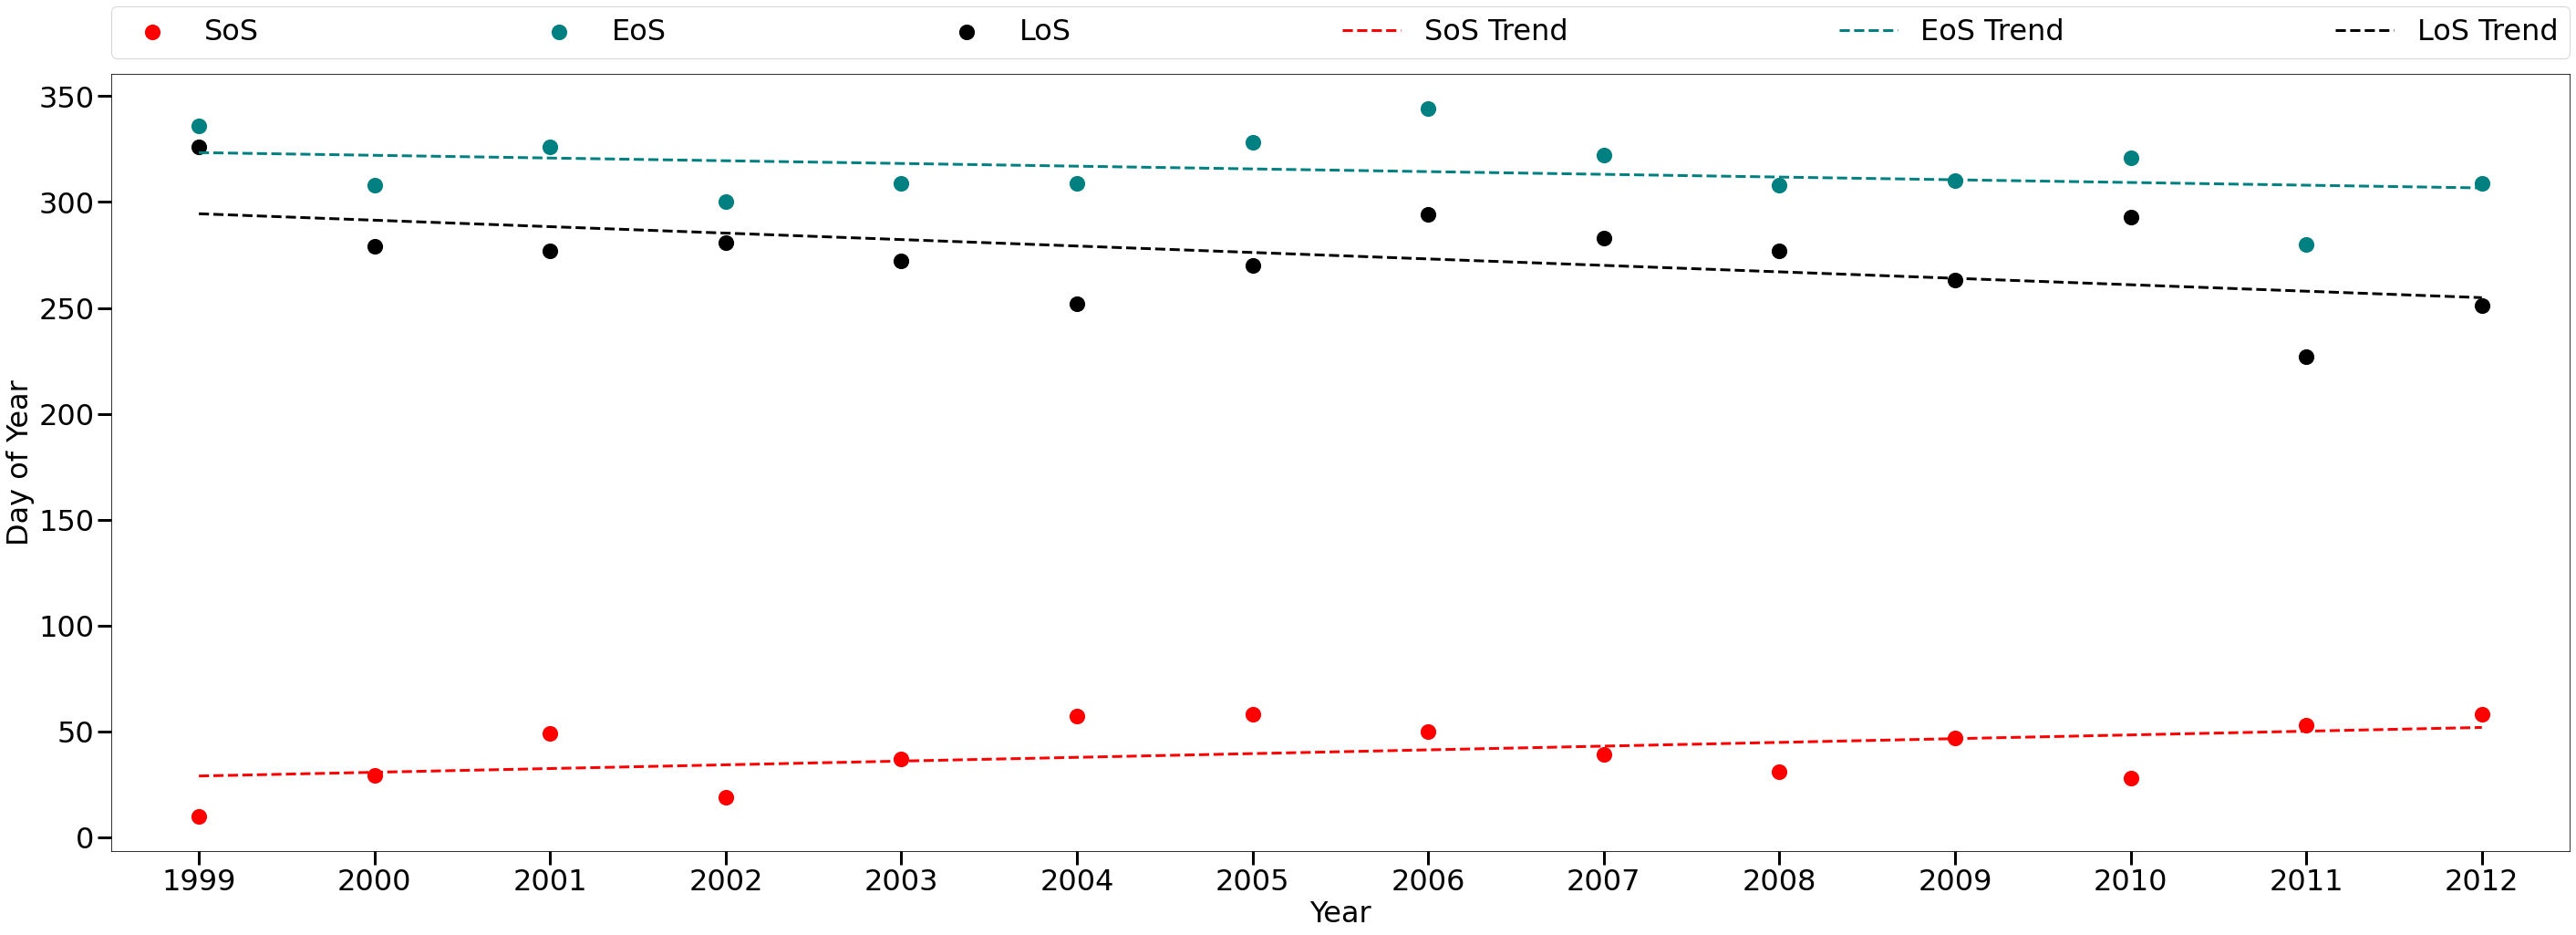

In [45]:

plt.rcParams["figure.figsize"] = (40,15)
plt.rcParams.update({'font.size' : 32})

fig, change = plt.subplots()

change.scatter(SROchange.index, SROchange['SOS_DOY'], s=200, label = 'SoS', color = 'red', linewidth = 3)
change.scatter(SROchange.index, SROchange['EOS_DOY'], s=200,label = 'EoS', color = 'teal', linewidth = 3)
change.scatter(SROchange.index, SROchange['diff'], s=200,label = 'LoS', color = 'black', linewidth = 3)


change.plot(SROchange.index, SoSp(x), label = 'SoS Trend', linestyle = 'dashed', color = 'red',linewidth = 3)
change.plot(SROchange.index, EoSp(x), label = 'EoS Trend', linestyle = 'dashed', color = 'teal',linewidth = 3)
change.plot(SROchange.index, LoSp(x), label = 'LoS Trend', linestyle = 'dashed', color ='black',linewidth = 3)


change.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower center',
           ncol=6, mode="expand", borderaxespad=0.)

change.set_xlim(1998.5,2012.5)
change.tick_params('x', length = 15, width = 3)
change.tick_params('y', length = 15, width = 3)
change.set_ylabel('Day of Year')
change.set_xlabel('Year')
#change.grid(True)
plt.xticks((1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012))
plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\SRO_Val\SRO_changes.jpeg', format = 'jpeg', dpi =400)
plt.show

In [46]:
print(pheno, SROchange)

         SRO_SoS  SRO_StartDateDelta    SRO_EoS  SRO_EndDateDelta  \
Index                                                               
1999  1999-01-10                  10 1999-12-02               336   
2000  2000-01-29                  29 2000-11-03               308   
2001  2001-02-18                  49 2001-11-22               326   
2002  2002-01-19                  19 2002-10-27               300   
2003  2003-02-06                  37 2003-11-05               309   
2004  2004-02-26                  57 2004-11-04               309   
2005  2005-02-27                  58 2005-11-24               328   
2006  2006-02-19                  50 2006-12-10               344   
2007  2007-02-08                  39 2007-11-18               322   
2008  2008-01-31                  31 2008-11-03               308   
2009  2009-02-16                  47 2009-11-06               310   
2010  2010-01-28                  28 2010-11-17               321   
2011  2011-02-22                  

C:\Users\Giorgio\AppData\Local\Temp\ipykernel_20988\1872069151.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\SRO_Val\SRO_GPPchanges.jpeg', format = 'jpeg', dpi =800)


<function matplotlib.pyplot.show(close=None, block=None)>

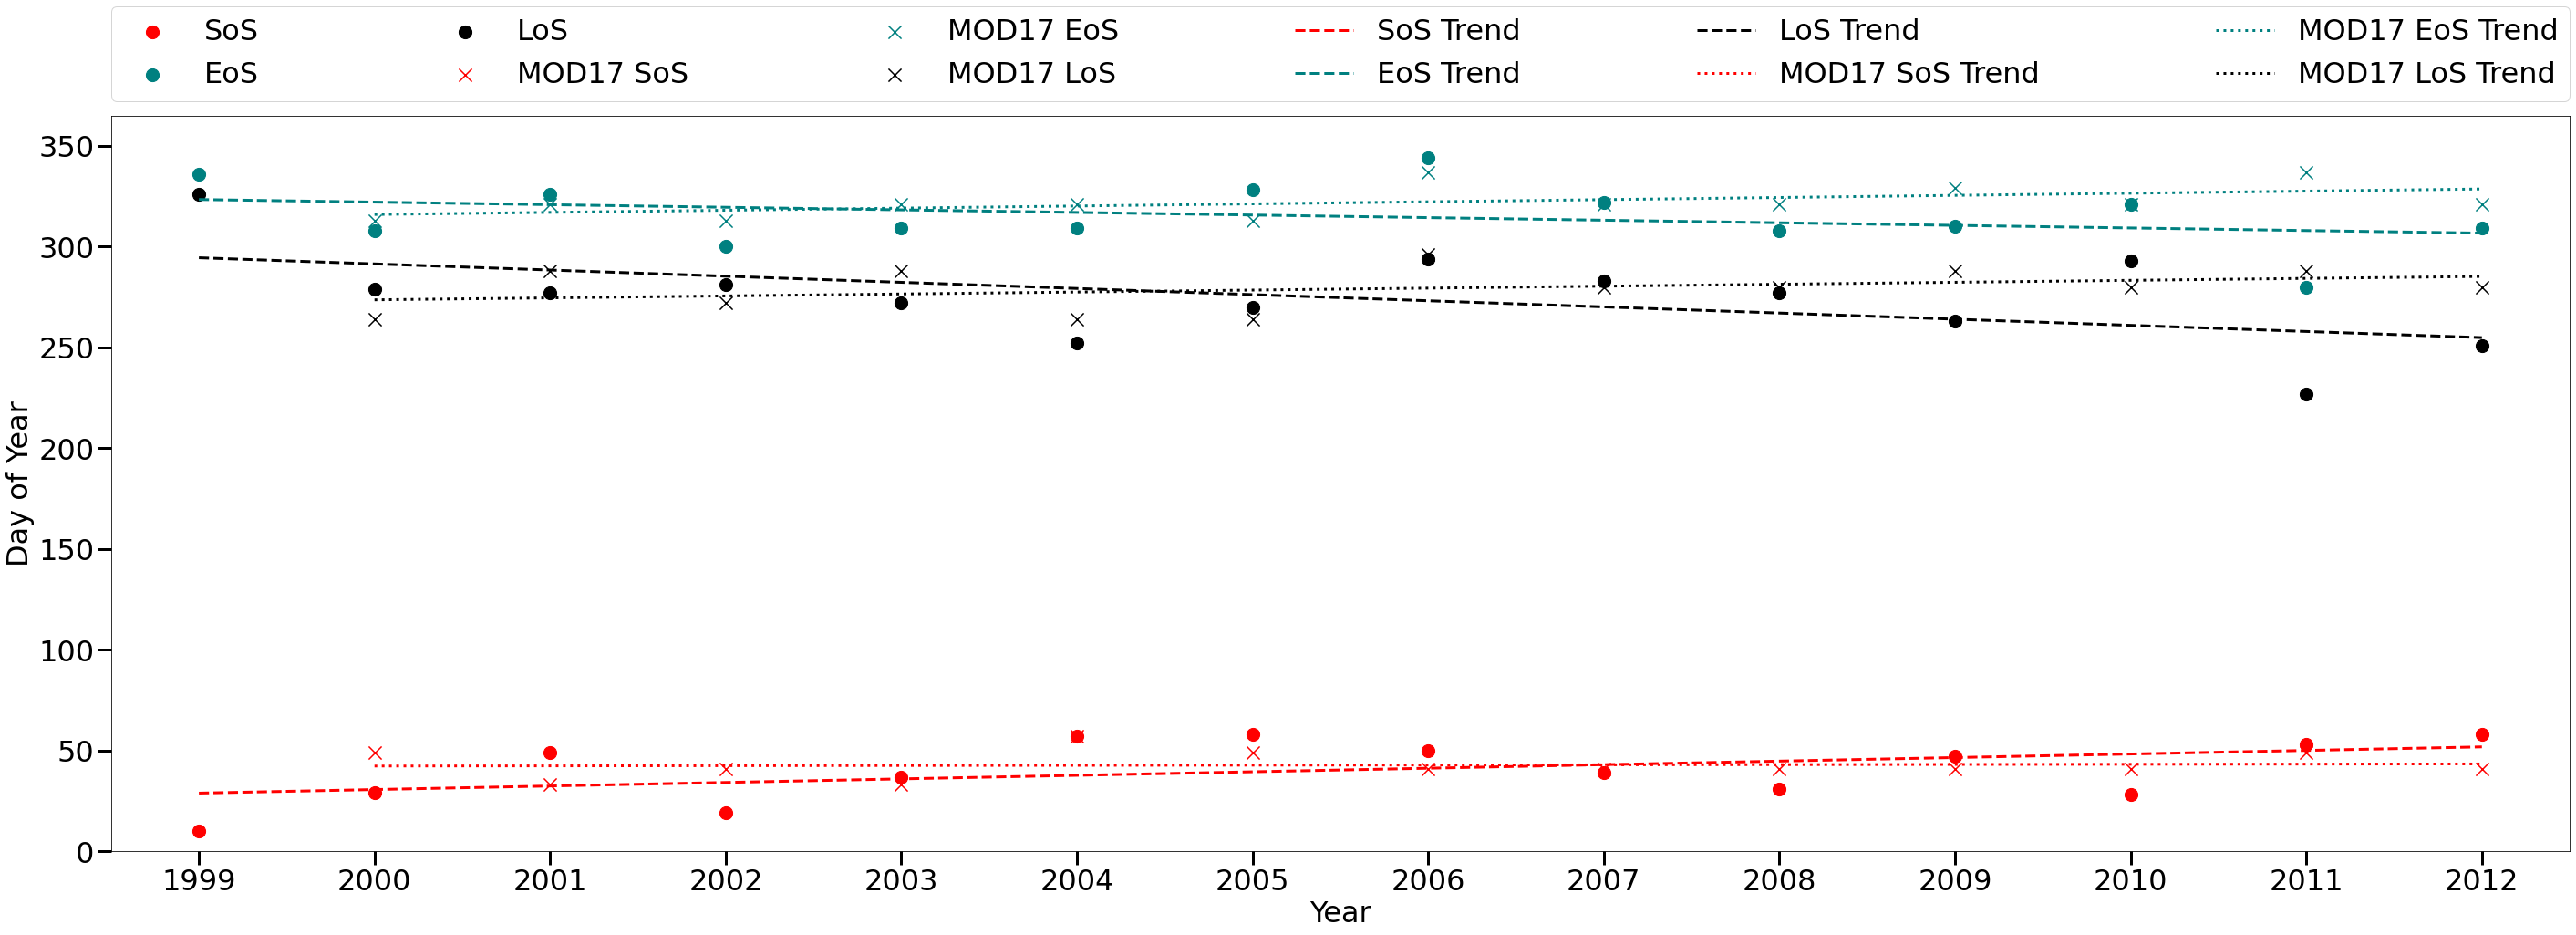

In [47]:
plt.rcParams["figure.figsize"] = (40,15)
plt.rcParams.update({'font.size' : 32})

fig, change2 = plt.subplots()

change2.scatter(pheno.index, pheno['SRO_StartDateDelta'], s=200, label = 'SoS', color = 'red')
change2.scatter(pheno.index, pheno['SRO_EndDateDelta'],  s=200,label = 'EoS', color = 'teal')
change2.scatter(pheno.index, pheno['diff'],  s=200,label = 'LoS', color = 'black')



change2.scatter(pheno.index, pheno['MOD17_GPP_StartDateDelta'], s=200, label = 'MOD17 SoS', color = 'red', marker = 'x')
change2.scatter(pheno.index, pheno['MOD17_GPP_EndDateDelta'], s=200,label = 'MOD17 EoS', color = 'teal', marker = 'x')
change2.scatter(pheno.index, pheno['MOD17_GPP_Diff'],  s=200,label = 'MOD17 LoS',color = 'black', marker = 'x' )


# regressions

change2.plot(SROchange.index, SoSp(x), label = 'SoS Trend', linestyle = 'dashed', color = 'red',linewidth = 3)
change2.plot(SROchange.index, EoSp(x), label = 'EoS Trend', linestyle = 'dashed', color = 'teal',linewidth = 3)
change2.plot(SROchange.index, LoSp(x), label = 'LoS Trend', linestyle = 'dashed', color ='black',linewidth = 3)

change2.plot(phenoless.index, SoSpGPP(x1), label = 'MOD17 SoS Trend', linestyle = ':', color = 'red',linewidth = 3)
change2.plot(phenoless.index, EoSpGPP(x1), label = 'MOD17 EoS Trend', linestyle = ':', color = 'teal',linewidth = 3)
change2.plot(phenoless.index, LoSpGPP(x1), label = 'MOD17 LoS Trend', linestyle = ':', color ='black',linewidth = 3)

change2.set_xlim(1998.5,2012.5)
change2.set_ylim(0,365)
change2.tick_params('x', length = 15, width = 3)
change2.tick_params('y', length = 15, width = 3)
change2.set_ylabel('Day of Year')
change2.set_xlabel('Year')

plt.xticks((1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower center',
           ncol=6, mode="expand", borderaxespad=0.)
plt.savefig(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Figures\SRO_Val\SRO_GPPchanges.jpeg', format = 'jpeg', dpi =800)
plt.show

In [114]:
df_y['GPP_DT_VUT_REF'].describe()
gpp = df_m['GPP_DT_VUT_REF']

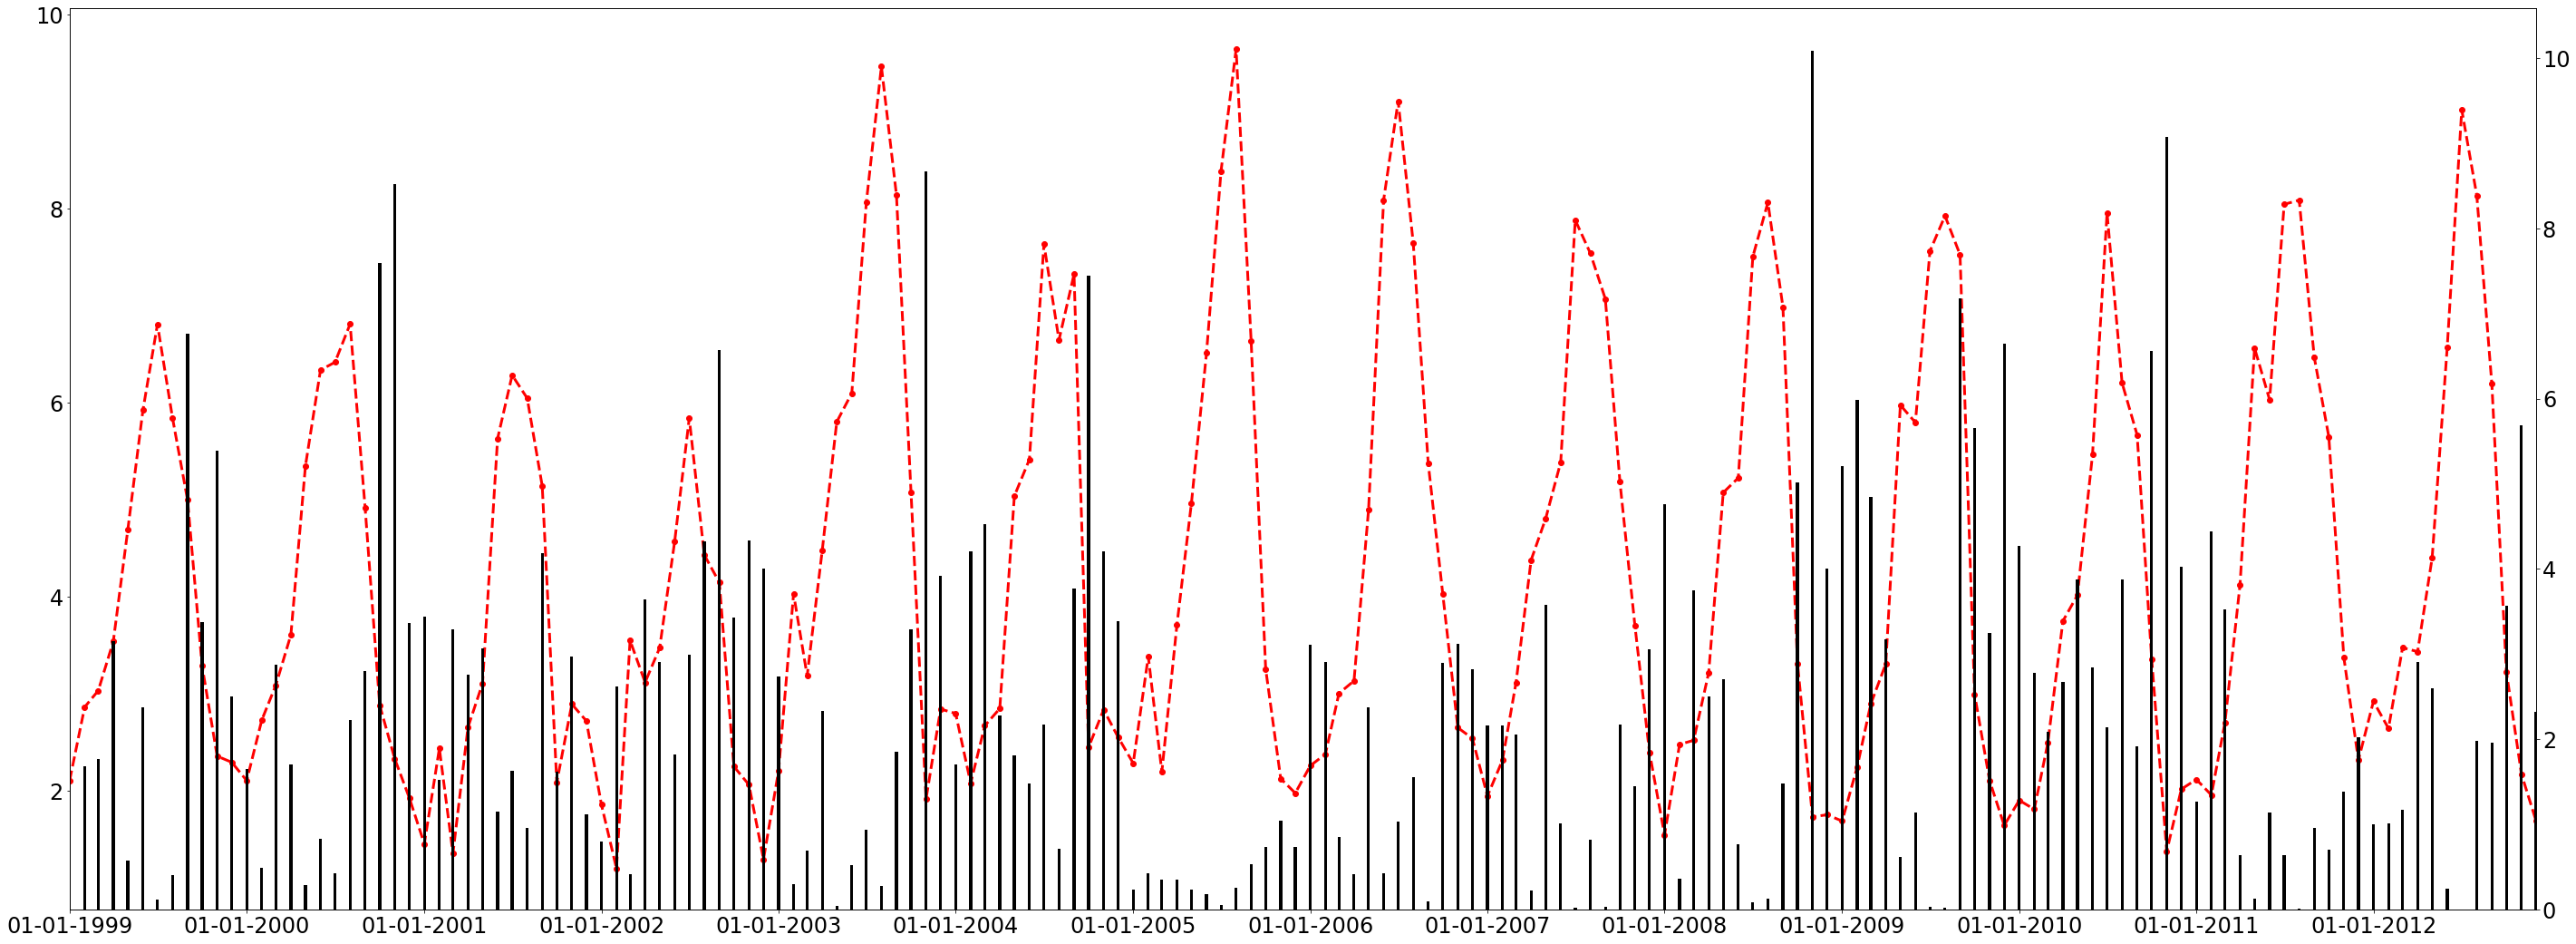

In [118]:
fig, month = plt.subplots()

month.plot(df_m.index, df_m['VPD_F'],'o--' , color = 'red', linewidth = 3)

mon = month.twinx()

mon.bar(df_m.index, df_m['P_F'], color = 'black', width = 6)

month.set_xlim(date2num([df_m.index.min(), df_m.index.max()]))
month.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
month.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))

#plt.yscale('log')
plt.show()



C:\Users\Giorgio\AppData\Local\Temp\ipykernel_20988\618378933.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)


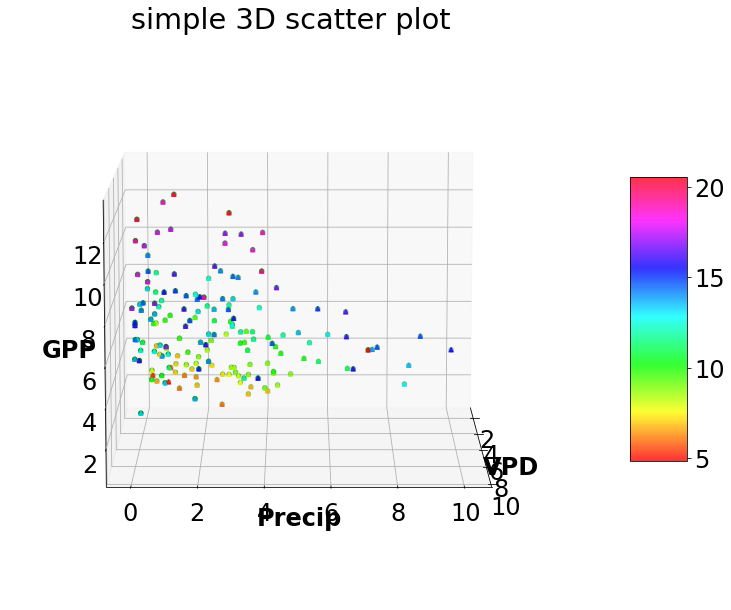

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 2880x1080 with 0 Axes>

In [143]:
#Creating figure
x = df_m['VPD_F'] 
y = df_m['P_F'] 
z = df_m['GPP_DT_VUT_REF']

fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

#Creating plot
ax.scatter3D(x,y,z, color = "green") 
plt.title("simple 3D scatter plot")

ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)

ax.set_xlabel('VPD', fontweight ='bold') 
ax.set_ylabel('Precip', fontweight ='bold') 
ax.set_zlabel('GPP', fontweight ='bold')

my_cmap = plt.get_cmap('hsv')

#Creating plot
sctt = ax.scatter3D(x, y, z, alpha = 0.8, c = (x + y + z), cmap = my_cmap, marker ='^')

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

for angle in range(0, 360): 
    ax.view_init(10, angle) 
    plt.draw() 
    plt.pause(.001)

#show plot
plt.show()

##### Creating figure
x = df_m['VPD_F']
y = df_m['P_F']
z = df_m['GPP_DT_VUT_REF']

fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x,y,z, color = "green")
plt.title("simple 3D scatter plot")

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

ax.set_xlabel('VPD', fontweight ='bold')
ax.set_ylabel('Precip', fontweight ='bold')
ax.set_zlabel('GPP', fontweight ='bold')

my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
# show plot
plt.show()